Lab 2 Biswas

# Part 1: The Ideal Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp

# Question 1
gamma = 0 #drag just for part 1
G = 6.6743e-11
m = 5.972e24
g = 9.81 #m/s^2
r = 6378.1e3 #m
a = (G*m)/(r**2)
#print(a)
del_x = 4000 #m

#using Kinematic equation
time = np.sqrt((2*del_x)/a)
print(f"How long a test mass takes to reach the bottom of the mine shaft using kinematic equations of motion is {time} seconds.")


How long a test mass takes to reach the bottom of the mine shaft using kinematic equations of motion is 28.57416552900485 seconds.


Question 2

$\frac{d^2y}{dt^2}$ = $\frac{dv}{dt}$

$\frac{dy}{dt}$ = v

$\frac{dv}{dt}$ = $-g - \alpha(v)^\gamma$

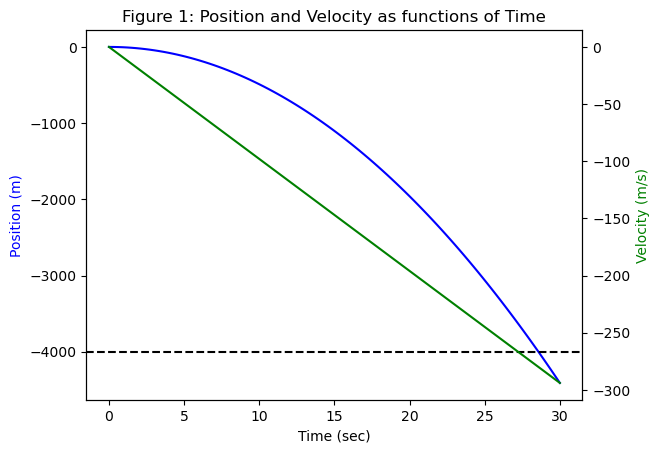

In [2]:
# Question 3
def eq_1(t, s):
    x = s[0]
    v = s[1]
    dy_dt = v
    dv_dt = -a
    return [dy_dt, dv_dt]

#t conditions
t0 = 0
tf = 30
time = np.linspace(t0, tf, 100)

# initial conditions
y0 = [0, 0]

# solving
function = scipy.integrate.solve_ivp(fun = eq_1, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time)
# assigning variables
t = function.t
pos = function.y[0]
vel = function.y[1]

#plotting
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, pos, color = 'blue', label = "position") 
ax2.plot(t, vel, color = 'green', label = "velocity")
ax.set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax.set_xlabel("Time (sec)")
ax.set_title("Figure 1: Position and Velocity as functions of Time")
ax.axhline(-4000, ls = '--', c = 'black')
fig.savefig("Figure 1.png")

In [3]:
# Question 4
def event(t, s):
    return s[0]+4000
    
x_func = scipy.integrate.solve_ivp(fun = eq_1, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time, 
                                   events = event)

event = [x_func.t_events[0][0], x_func.y_events[0][0][0]]
print(f"The time at which the mass hits the bottom of the shaft using solve_ivp without drag is {event[0]} sec")

The time at which the mass hits the bottom of the shaft using solve_ivp without drag is 28.574165529004848 sec


Using the calculation above I got that the time at which the mass hits the bottom of the mineshaft is 28.557 seconds. Using the previous part and kinematic equations, I got that mass hits the bottom of the mineshaft at 28.574 seconds. While these values are very close, they vary slightly at the 14th decimal place

# Part 2: Including Drag and a Variable g

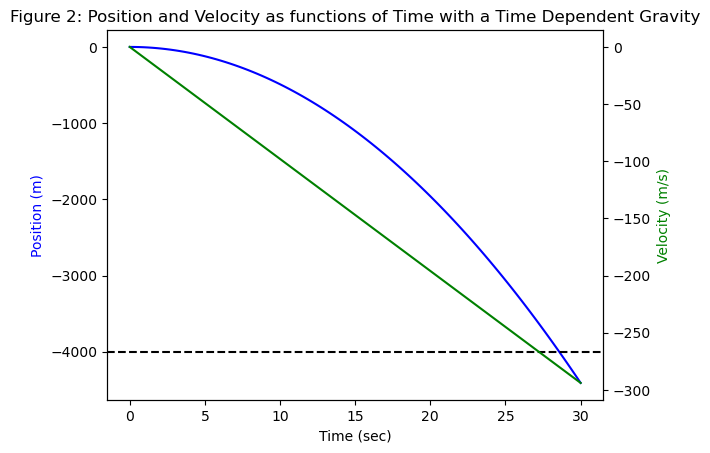

In [4]:
# Question 1
g0 = -9.81 #m/s^2

def eq_2(t, s):
    r_e = 6.3781e6
    x = s[0]
    v = s[1]
    r = s[0] + r_e
    dy_dt = v
    dv_dt = -a*(r/r_e)
    return [dy_dt, dv_dt]

# solving
g_func = scipy.integrate.solve_ivp(fun = eq_2, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time)
# assigning the output to vars
t = g_func.t
pos = g_func.y[0]
vel = g_func.y[1]

# plotting
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, pos, color = 'blue', label = "position") 
ax2.plot(t, vel, color = 'green', label = "velocity")
ax.set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax.set_xlabel("Time (sec)")
ax.set_title("Figure 2: Position and Velocity as functions of Time with a Time Dependent Gravity")
ax.axhline(-4000, ls = '--', c = 'black')
fig.savefig("Figure 2.png")

In [5]:
# event
def event(t, s):
    return s[0]+4000
    
x_func = scipy.integrate.solve_ivp(fun = eq_2, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time, 
                                   events = event)

event = [x_func.t_events[0][0], x_func.y_events[0][0][0]]
print(f"The time at which the mass hits the bottom of the shaft is {event[0]} sec")

The time at which the mass hits the bottom of the shaft is 28.575659086738423 sec


Question 2

What effect does incorporating a height-dependent g have on the fall time? Explain.

Incorporating a height dependent component means a direct relationship between the two. When one increases the other increases. As you get closer to the center of the Earth, you feel a lesser pull of gravity because there is less mass interior to you pulling you in.

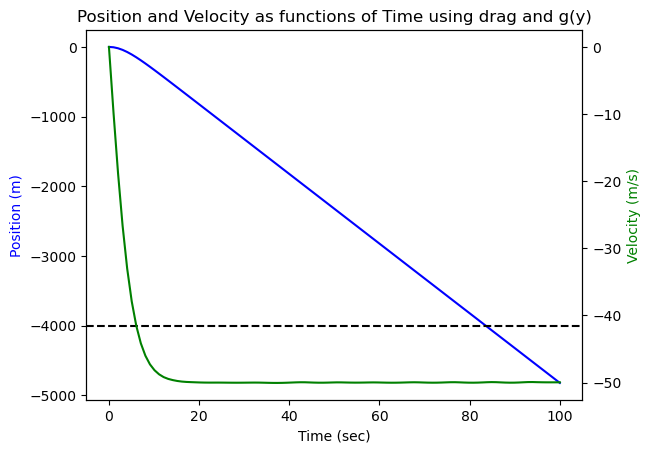

In [6]:
# Question 3
r_e = 6.3781e6
t0 = 0
tf = 100
time = np.linspace(t0, tf, 100)

# function
def eq_3(t, s):
    g0 = -9.81 #m/s^2
    r_e = 6.3781e6
    gamma = 2
    r = s[0] + r_e
    a = (G*m)/(r**2)
    alpha = (0+a)/(50**2)
    
    x = s[0]
    v = s[1]
    
    dy_dt = v
    dv_dt = g0*(r/r_e) + alpha*np.abs(dy_dt)**gamma
    return [dy_dt, dv_dt]

# solving
g_func = scipy.integrate.solve_ivp(fun = eq_3, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time)
# assigning vars
t = g_func.t
pos = g_func.y[0]
vel = g_func.y[1]

#plotting
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, pos, color = 'blue', label = "position") 
ax2.plot(t, vel, color = 'green', label = "velocity")
ax.set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax.set_xlabel("Time (sec)")
ax.set_title("Position and Velocity as functions of Time using drag and g(y)")
ax.axhline(-4000, ls = '--', c = 'black')
fig.savefig("Part 2 Fig.png")

In [7]:
# event
def event(t, s):
    return s[0]+4000
    
x_func = scipy.integrate.solve_ivp(fun = eq_3, 
                                   t_span = (t0, tf), 
                                   y0 = y0, 
                                   t_eval = time, 
                                   events = event)

event = [x_func.t_events[0][0], x_func.y_events[0][0][0]]
print(f"The time at which the mass hits the bottom of the shaft while taking into account drag is", event[0], f"sec")

The time at which the mass hits the bottom of the shaft while taking into account drag is 83.51910915352114 sec


How can you calibrate the value of α? Think about what we did in Lecture 16,
where we assumed a sky-diver’s terminal speed was 50 m/s. You should assume the same of
the test mass. What affect does including drag have on the fall time?

For alpha, we can use the Equation 1 in the manual to calibrate to find this value. Including drag has a big effect on the fall time. We see an increase by a factor of almost three. We can plug in 0 for the left side of the equation and have $\frac{dy}{dt}$ equal to the terminla velocity, 50 m/s in our case

# Part 3: The Coriolis Force

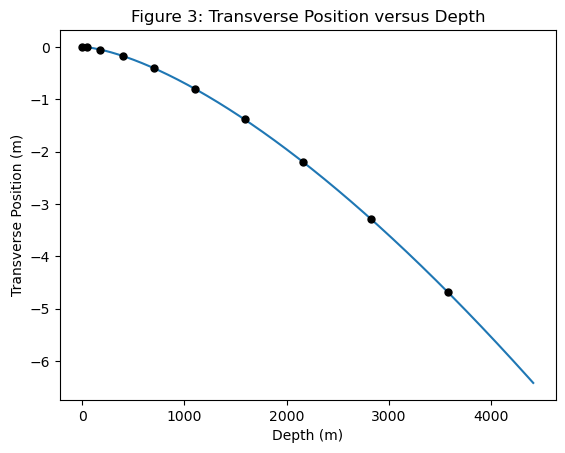

In [8]:
mass = 1 #kg
omega = 7.272e-5 #rad/s

# Question 1
def derivs(t, s):
    x = s[0] #transverse pos
    y = s[1] #depth pos
    
    vx = s[2] #transverse vel
    vy = s[3] #depth vel
    r = r_e + y 

    dxdt = vx
    dydt = vy
    
    dv_x = 2*omega*vy #transverse acc
    dv_y = -g0*(r/r_e) - 2*omega*vx #depth acc

    return [dxdt, dydt, dv_x, dv_y]

# Question 2
# time
t0 = 0
tf = 30
time = np.linspace(t0, tf, 1000)

# initial conditions
initial_cond = [0, 0, 0, 0]

# solving
soln = scipy.integrate.solve_ivp(fun = derivs, 
                                   t_span = (t0, tf), 
                                   y0 = initial_cond, 
                                   t_eval = time)
# assigning the output to variables
t = soln.t
x = soln.y[0]
y = soln.y[1]
v_x = soln.y[2]
v_y = soln.y[3]

# dots every 3 seconds
dot_every = np.arange(0,30,3)
soln_dots = scipy.integrate.solve_ivp(fun = derivs, 
                                      t_span = (t0, tf), 
                                      y0 = initial_cond, 
                                      t_eval = dot_every)
dot_xtransverse = soln_dots.y[0]
dot_xdepth = soln_dots.y[1]

# plotting
fig, ax = plt.subplots()
ax.plot(y, -x, label = "position") 
ax.plot(dot_xdepth, -dot_xtransverse, " ", marker = "o", color = 'black', ms=5)
ax.set_ylabel("Transverse Position (m)")
ax.set_xlabel("Depth (m)")
ax.set_title("Figure 3: Transverse Position versus Depth")
fig.savefig("Figure 3.png")

In [9]:
# two events
def event_side(t, s):
    return s[0]-2.5

def event_bottom(t, s):
    return s[1]-4000
    
soln_side = scipy.integrate.solve_ivp(fun = derivs, 
                                   t_span = (t0, tf), 
                                   y0 = initial_cond, 
                                   t_eval = time, 
                                   events = event_side)

soln_bottom = scipy.integrate.solve_ivp(fun = derivs, 
                                   t_span = (t0, tf), 
                                   y0 = initial_cond, 
                                   t_eval = time, 
                                   events = event_bottom)

hit_side = soln_side.t_events[0][0]
print(f"The mass will hit the side at {hit_side} seconds")
hit_bottom = soln_bottom.t_events[0][0]
print(f"The mass will hit the bottom at {hit_bottom} seconds")
print(f"Depth at when the mass hits the side at {soln_side.y_events[0][0][1]} meters")

The mass will hit the side at 21.90655678266908 seconds
The mass will hit the bottom at 28.5553907441915 seconds
Depth at when the mass hits the side at 2354.0387133033637 meters


If the mine shaft is 5m wide, and you drop the test mass from the center, does the test mass
reach the bottom? Or does it bump into the wall first?
It will hit the wall first at 21.9 seconds, and hit the bottom at 28.55.

In [10]:
# Question 3
# function
def F_cor_drag(t, s):
    x = s[0] #transverse pos
    y = s[1] #depth pos
    
    vx = s[2] #transverse vel
    vy = s[3] #depth vel
    r = r_e + y 
    
    dv_x = 2*omega*vy #transverse acc
    dv_y = -g0*(r/r_e) - 2*omega*vx + alpha*np.abs(vy)**gamma #depth acc

    return [vx, vy, dv_x, dv_y]

# time and initial conditions
t0 = 0 
tf = 100

initial_cond = [0, 0, 0, 0]
time = np.linspace(t0, tf, 500)

#defining a varying alpha
alpha = (a)/((np.abs(50))**gamma)
#print(alpha)

#solving
coriolis = scipy.integrate.solve_ivp(fun = F_cor_drag, 
                                     t_span = (t0, tf), 
                                     y0 = initial_cond, 
                                     t_eval = time)

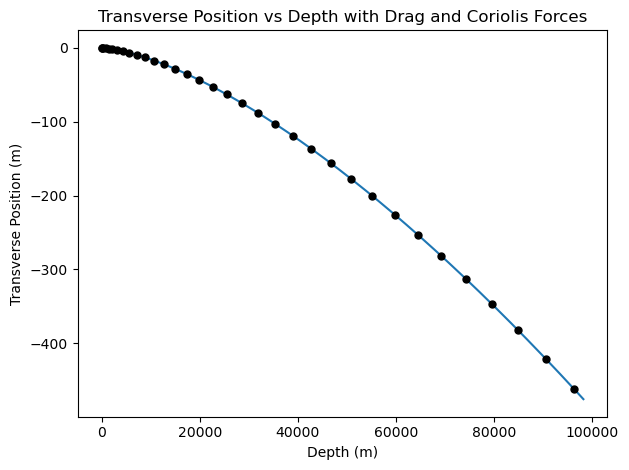

In [11]:
# dots every 3 seconds
dot_every = np.arange(0,100,3)
soln_dots = scipy.integrate.solve_ivp(fun = F_cor_drag, 
                                      t_span = (t0, tf), 
                                      y0 = initial_cond, 
                                      t_eval = dot_every)
dot_xtransverse = soln_dots.y[0]
dot_xdepth = soln_dots.y[1]

fig, ax = plt.subplots()

# assigning to vars
x = coriolis.y[0]
y = coriolis.y[1]

# plotting
ax.plot(y, -x, "-")
ax.plot(dot_xdepth, -dot_xtransverse, " ", marker = "o", color = 'black', ms=5)
ax.set_xlabel("Depth (m)")
ax.set_ylabel("Transverse Position (m)")
ax.set_title("Transverse Position vs Depth with Drag and Coriolis Forces")
fig.tight_layout()
fig.savefig("Part 3 Transverse Drag and Cor.png")

Drag does make a difference because the mass takes longer to fall as we expected. 

# Part 4: An infinitely deep mine

In [12]:
r_e = 6378.1e3
# function
def function_4(t, s):
    y = s[0] 
    v = s[1] 
    
    dy_dt = v
    dv_dt = g0*(y/r_e)
    return np.array((dy_dt, dv_dt))

# times and initial conditions
t0 = 0
tf = 10000
time = np.linspace(t0, tf, 500)

s0 = [r_e, 0]

# solving
inf_deep_mine = scipy.integrate.solve_ivp(fun = function_4, 
                                   t_span = (t0, tf), 
                                   y0 = s0, 
                                   t_eval = time)


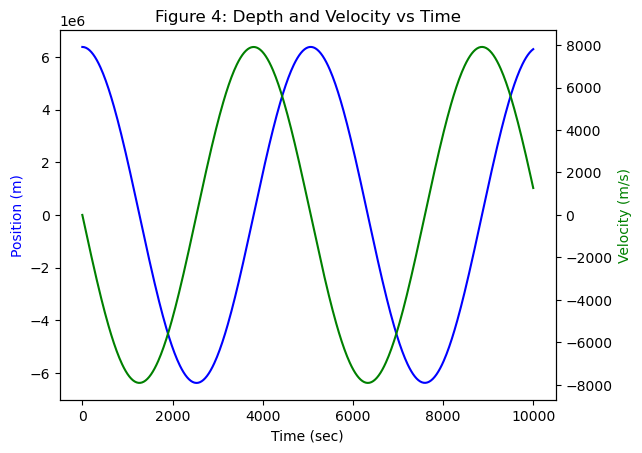

In [13]:
# plotting
t = inf_deep_mine.t
pos = inf_deep_mine.y[0]
vel = inf_deep_mine.y[1]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t, pos, color = 'blue', label = "position") 
ax2.plot(t, vel, color = 'green', label = "velocity")
ax.set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax.set_xlabel("Time (sec)")
ax.set_title("Figure 4: Depth and Velocity vs Time")
fig.savefig("Figure 4.png")

In this graph we see a sinusoidal pattern as the mass travels from one pole to another. This is what we expect because the mass will oscillate between the poles with a phase shift of $\frac{\pi}{2}$ between them.

In [14]:
# events
def event_otherside(t,s):
    return s[0] + 0.999*r_e

def event_center(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = function_4,
                                 t_span = (t0, tf), 
                                 y0 = s0, 
                                 t_eval = time, 
                                 events = (event_otherside, event_center), rtol=1e-10, atol =1e-12)

events = [soln.t_events[1][0], soln.y_events[1][0][1]]
print(f"Time for the mass to reach the center of Earth {events[0]} seconds at speed {events[1]} m/s")

events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"Time for the mass to reach the other side with no drag {events[0]} seconds")

Time for the mass to reach the center of Earth 1266.5753611716918 seconds at speed -7910.067066573188 m/s
Time for the mass to reach the other side with no drag 2497.087681309648 seconds


In [15]:
# v orb and crossing time
v_circ = np.sqrt((G*m)/r_e)
orbital_period = (2*np.pi*r_e)/(v_circ)
print(f"Orbital period found = {orbital_period}")

ratio = orbital_period / 2497.0876
print(f"Ratio of orbital period to crossing time: {ratio}")

Orbital period found = 5069.371199675785
Ratio of orbital period to crossing time: 2.0301134808709893


Orbital period is double the crossing time

# Part 5: A non-uniform Earth

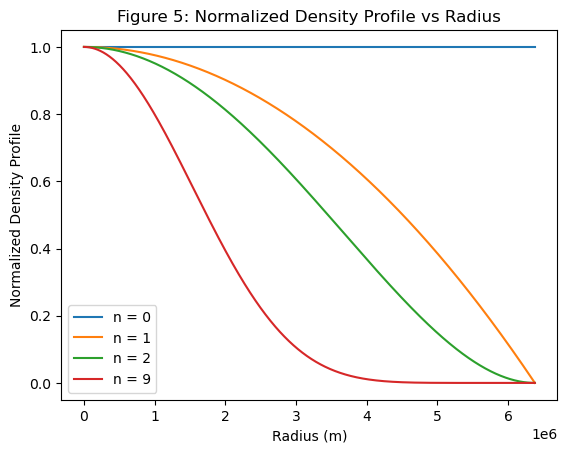

In [16]:
# density and radii
n = [0, 1, 2, 9]
r = np.linspace(0, r_e, 1000)

density_profile = []

def density_eq(r, n):
    return (1-(r**2)/(r_e**2))**n

# plotting
fig, ax = plt.subplots()

# evaluating at each n
for i in range(len(n)):
    density_profile = density_eq(r, n[i])
    ax.plot(r, density_profile, label = f"n = {n[i]}")
# plotting
ax.set_ylabel("Normalized Density Profile")
ax.set_xlabel("Radius (m)")
ax.set_title("Figure 5: Normalized Density Profile vs Radius")
ax.legend()
fig.savefig("Figure 5.png")

In [ ]:
from scipy.integrate import quad

n = [0, 1, 2, 9]
r = np.linspace(0, r_e, 10000)

# all of my functions

def rho_int(r, n):
    integrand = 4*np.pi*((1-(r**2/r_e**2))**n)*r**2
    return integrand

def rho(r, n):
    rho_value, rho_err = quad(rho_int, 0, r_e, args = (n,))
    rho_n = m/rho_value
    return rho_n*(1-(r**2/r_e**2))**n

def Mass(r, n):
    return rho(r, n)*4*np.pi*r**2

def Force(r, n):
    M_r, M_r_err = quad(Mass, 0, r, args = (n,))
    return G*M_r/r**2

fig, ax = plt.subplots()
force_profiles = {}

for i in n:
    force_profiles[i] = np.array([Force(j, i) for j in r])
    ax.plot(r, force_profiles[i], label = f"n = {i}")
# plotting
ax.set_ylabel("Forceper unit mass (m/s^2)")
ax.set_xlabel("Radius (m)")
ax.set_title("Figure 6: Force Profile vs Radius")
ax.legend()
fig.savefig("Figure 6.png")

C:\Users\debik\AppData\Local\Temp\ipykernel_14540\1287996683.py:22: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r/r**2


In [ ]:
n = [0, 1, 2, 9]

# function, solving, and assigning vars for n = 0

def part5_0(t, s):
    y = s[0]
    v = s[1]
    dy_dt = v
    dv2_dt = -Force(y, n[0])
    return np.array([dy_dt, dv2_dt])

for i in range(len(n)):
    acc0 = np.zeros(10000)
    for j in range(len(n)):
        acc0[j] = Force(r[j], n[i])

#t conditions
t_init = 0
t_final = 10000

# initial conditions
y0 = [r_e, 0]

time = np.linspace(t_init, t_final, 1000)

function = scipy.integrate.solve_ivp(fun = part5_0, 
                                   t_span = (t_init, t_final), 
                                   y0 = y0, 
                                   t_eval = time)
t0 = function.t
pos0 = function.y[0]
vel0 = function.y[1]
print(function)

In [ ]:
# function, solving, and assigning vars for n = 1
def part5_1(t, s):
    y = s[0]
    v = s[1]
    dy_dt = v
    dv2_dt = -Force(y, n[1])
    return np.array([dy_dt, dv2_dt])

for i in range(len(n)):
    acc1 = np.zeros(10000)
    for j in range(len(n)):
        acc1[j] = Force(r[j], n[i])

y0 = [r_e, 0]

time = np.linspace(t_init, t_final, 1000)

function = scipy.integrate.solve_ivp(fun = part5_1, 
                                   t_span = (t_init, t_final), 
                                   y0 = y0, 
                                   t_eval = time)
t1 = function.t
pos1 = function.y[0]
vel1 = function.y[1]

In [ ]:
# function, solving, and assigning vars for n = 2
def part5_2(t, s):
    y = s[0]
    v = s[1]
    dy_dt = v
    dv2_dt = -Force(y, n[2])
    return np.array([dy_dt, dv2_dt])

for i in range(len(n)):
    acc2 = np.zeros(10000)
    for j in range(len(n)):
        acc2[j] = Force(r[j], n[i])

y0 = [r_e, 0]

time = np.linspace(t_init, t_final, 1000)

function = scipy.integrate.solve_ivp(fun = part5_2, 
                                   t_span = (t_init, t_final), 
                                   y0 = y0, 
                                   t_eval = time)
t2 = function.t
pos2 = function.y[0]
vel2 = function.y[1]

In [ ]:
# function, solving, and assigning vars for n = 9
def part5_9(t, s):
    y = s[0]
    v = s[1]
    dy_dt = v
    dv2_dt = -Force(y, n[3])
    return np.array([dy_dt, dv2_dt])

for i in range(len(n)):
    acc1 = np.zeros(10000)
    for j in range(len(n)):
        acc1[j] = Force(r[j], n[i])

y0 = [r_e, 0]

time = np.linspace(t_init, t_final, 1000)

function = scipy.integrate.solve_ivp(fun = part5_9, 
                                   t_span = (t_init, t_final), 
                                   y0 = y0, 
                                   t_eval = time)
t9 = function.t
pos9 = function.y[0]
vel9 = function.y[1]

In [ ]:
fig, ax = plt.subplots(2, 2)

ax2 = ax[0,0].twinx()
ax[0,0].plot(t0, pos0, color = 'blue', label = "Position at n = 0")
ax2.plot(t0, vel0, color = 'green', label = "Velocity at n = 0")
ax[0,0].set_xlabel("Time (sec)")
ax[0,0].set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax[0,0].set_title("Pos and Vel vs Time when n = 0")
fig.tight_layout()

ax2 = ax[0,1].twinx()
ax[0,1].plot(t1, pos1, color = 'blue', label = "Position at n = 1")
ax2.plot(t1, vel1, color = 'green', label = "Velocity at n = 1")
ax[0,1].set_xlabel("Time (sec)")
ax[0,1].set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax[0,1].set_title("Pos and Vel vs Time when n = 1")
fig.tight_layout()

ax2 = ax[1,0].twinx()
ax[1,0].plot(t2, pos2, color = 'blue', label = "Position at n = 2")
ax2.plot(t2, vel2, color = 'green', label = "Velocity at n = 2")
ax[1,0].set_xlabel("Time (sec)")
ax[1,0].set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax[1,0].set_title("Pos and Vel vs Time when n = 2")
fig.tight_layout()


ax2 = ax[1,1].twinx()
ax[1,1].plot(t9, pos9, color = 'blue', label = "Position at n = 9")
ax2.plot(t9, vel9, color = 'green', label = "Velocity at n = 9")
ax[1,1].set_xlabel("Time (sec)")
ax[1,1].set_ylabel("Position (m)", c = 'blue')
ax2.set_ylabel("Velocity (m/s)", c = 'green')
ax[1,1].set_title("Pos and Vel vs Time when n = 9")

fig.suptitle("Figure 7: Position and Velocity vs Time for n = 0, 1, 2, 9")
fig.tight_layout()
fig.savefig("Figure 7.png")

In [ ]:
def event(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = part5_0,
                                 t_span = (t_init, t_final), 
                                 y0 = y0, 
                                 t_eval = time, 
                                 events = event, rtol=1e-10, atol = 1e-12)

events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"Time for the mass to reach the center of Earth {events[0]} seconds at speed {events[1]} m/s n = 0")

soln = scipy.integrate.solve_ivp(fun = part5_1,
                                 t_span = (t_init, t_final), 
                                 y0 = y0, 
                                 t_eval = time, 
                                 events = event, rtol=1e-10, atol = 1e-12)

events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"Time for the mass to reach the center of Earth {events[0]} seconds at speed {events[1]} m/s n = 1")

soln = scipy.integrate.solve_ivp(fun = part5_2,
                                 t_span = (t_init, t_final), 
                                 y0 = y0, 
                                 t_eval = time, 
                                 events = event, rtol=1e-10, atol = 1e-12)

events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"Time for the mass to reach the center of Earth {events[0]} seconds at speed {events[1]} m/s n = 2")

soln = scipy.integrate.solve_ivp(fun = part5_9,
                                 t_span = (t_init, t_final), 
                                 y0 = y0, 
                                 t_eval = time, 
                                 events = event, rtol=1e-10, atol = 1e-12)

events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"Time for the mass to reach the center of Earth {events[0]} seconds at speed {events[1]} m/s n = 9")

# Part 6: A lunar mine shaft

In [ ]:
r_m = 1738.1e3
m_m = 7.35e22

g0 = (G*m_m)/(r_m**2)

def func_moon(t, s):
    y = s[0] 
    v = s[1] 
    
    dy_dt = v
    dv_dt = -g0*(y/r_m)
    return np.array((dy_dt, dv_dt))

t0 = 0
tf = 10000
time = np.linspace(t0, tf, 500)

s0 = [r_m, 0]

moon_mine = scipy.integrate.solve_ivp(fun = func_moon, 
                                   t_span = (t0, tf), 
                                   y0 = s0, 
                                   t_eval = time)

print(moon_mine)

In [ ]:
def event_center(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = func_moon,
                                 t_span = (t0, tf), 
                                 y0 = s0, 
                                 t_eval = time, 
                                 events = event_center, rtol=1e-10)

events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"Time for the mass to reach the center of the Moon {events[0]} seconds")

In [ ]:
moon_dens = (m_m/((4/3)*np.pi*r_m**3))
earth_dens = (m/((4/3)*np.pi*r_e**3))
ratio = moon_dens/earth_dens
print(f"The ratio of the moon density to the earth density is {ratio}")

$\frac{d^2y}{dt^2}$ = $-g_0\frac{y}{R}$ <br>
A solution to this differential equations because of the negative sign and the relationship of the sine and cosine derivatives <br>
$y(t)$ = $Y_0cos(\omega t) + V_0sin(\omega t)$ <br>
If $V_0 = 0$, $y(t)$ = 0 then $\omega t$ = $\frac{\pi}{2}$ <br>
t = $\sqrt\frac{\pi^2 R}{4 g_0}$ <br>
$g_0$ = $G \frac{\rho 4 \pi R^3}{3 R^3}$ = $G \frac{\rho 4 \pi R}{3}$ <br>
$t_\text{center}$ = $\sqrt\frac{\pi^2 R}{4 G\frac{4 \rho R}{3}}$ = $\sqrt\frac{3 \pi}{16 G \rho}$

In [ ]:
time_center = np.sqrt(3*np.pi/(16*G*moon_dens))
print(f"Time for the mass to reach the center of the Moon using the derived equation {time_center} seconds")